# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [36]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of my {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of my {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of my 1.2 BTC is $22373.88
The current value of my 5.3 ETH is $2875.78


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [37]:
# Format current date as ISO format
#from datetime import datetime
#startdate = datetime.now()

#i used now function but i brought no data so I had to use 2020-11-20 date as a start date

today = pd.Timestamp('2020-11-20', tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_investments = alpaca.get_barset(tickers, timeframe, start = today).df

# Preview DataFrame
df_investments.head()

AGG                                     SPY  \
                             open    high     low   close   volume   open   
time                                                                        
2020-11-20 00:00:00-05:00  118.19  118.34  118.13  118.29  5496191  357.5   

                                                             
                             high     low   close    volume  
time                                                         
2020-11-20 00:00:00-05:00  357.72  355.25  355.34  47947194

In [9]:
# Pick AGG and SPY close prices
agg_close_price = round(df_investments[tickers[0]]['close'][0],2)
spy_close_price = round(df_investments[tickers[1]]['close'][0],2)

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.29
Current SPY closing price: $355.34


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17767.00
The current value of your 200 AGG shares is $23658.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
savings_data = [my_btc_value+my_eth_value, my_spy_value+my_agg_value]

df_savings = pd.DataFrame(savings_data, columns=['amount'], index=['cyrpto','shares'])


# Display savings DataFrame
df_savings.head()

,amount
cyrpto,25249.66
shares,41425.00


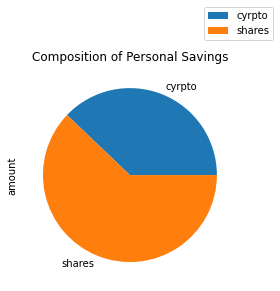

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y='amount',title='Composition of Personal Savings').legend(loc="lower center", bbox_to_anchor=(1, 1.1), ncol=1);


In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your financial goal")
else:
    print("You are "+str(emergency_fund-total_savings)+" away from reaching your financial goal")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-11-20', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-11-20', tz='America/New_York').isoformat()

In [38]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers, 
    timeframe, 
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2015-11-20 00:00:00-05:00  108.77  108.82  108.6000  108.62  1893587.0   
2015-11-23 00:00:00-05:00  108.65  108.76  108.5700  108.68  1595639.0   
2015-11-24 00:00:00-05:00  108.75  108.80  108.6611  108.73  1153821.0   
2015-11-25 00:00:00-05:00  108.77  108.84  108.6900  108.78  1059092.0   
2015-11-27 00:00:00-05:00  108.85  108.87  108.7700  108.79   605603.0   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2015-11-20 00:00:00-05:00  209.45  210.12  208.86  209.35  67021762  
2015-11-23 00:00:00-05:00  209.38  209.98  208.52  209.06  54738608  
2015-11-24 00:00:00-05:00  207.87  209.83  207.41  209.38  81748691  
2015-11-25 00:00:00-05:00  209.50  209.74  209.01  209.32  42760518  
2015-11-27 00:00:00-05:00  209.43  209.80  208.86  209.53  27557063

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [39]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2015-11-20 00:00:00-05:00  108.77  108.82  108.6000  108.62  1893587.0   
2015-11-23 00:00:00-05:00  108.65  108.76  108.5700  108.68  1595639.0   
2015-11-24 00:00:00-05:00  108.75  108.80  108.6611  108.73  1153821.0   
2015-11-25 00:00:00-05:00  108.77  108.84  108.6900  108.78  1059092.0   
2015-11-27 00:00:00-05:00  108.85  108.87  108.7700  108.79   605603.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-11-20 00:00:00-05:00          NaN  209.45  210.12  208.86  209.35   
2015-11-23 00:00:00-05:00     0.000552  209.38  209.98  208.52  209.06   
2015-11-24 00:00:00-05:00     0.000460  207.87  209.83  207.41  209.38   
2015-11-25 00:00:00-05:00     0.000460  209.50  209.74  209.01  209.32   
2015-11-27 00:00:00-05:00     0.000092  209.43  209.80  208.86  209.53   

                                                  
                             volume daily_return  
time                                              
2015-11-20 00:00:00-05:00  67021762          NaN  
2015-11-23 00:00:00-05:00  54738608    -0.001385  
2015-11-24 00:00:00-05:00  81748691     0.001531  
2015-11-25 00:00:00-05:00  42760518    -0.000287  
2015-11-27 00:00:00-05:00  27557063     0.001003

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999761,0.993314,0.994539,0.995740,0.994294,1.011593,0.999738,1.007515,0.996472,1.011000,...,1.000652,0.993894,0.998972,0.995485,0.988537,1.004470,0.998663,0.993931,1.002795,0.996729
2,1.000506,0.990999,0.994049,0.977315,0.984799,1.018964,1.012493,1.011201,0.992527,1.015111,...,0.995978,0.995572,1.002533,0.989438,0.986916,0.995448,0.998340,0.979100,0.993349,0.991055
3,0.993260,0.993130,0.992795,0.979293,0.980633,1.018972,1.007252,1.016916,0.978570,1.035176,...,1.001675,0.988656,0.997635,0.994731,0.980770,0.992797,0.995090,0.976466,1.001453,0.987547
4,0.993659,0.985580,0.993448,0.975901,0.980820,1.012261,1.007623,1.012669,0.982235,1.031774,...,0.989535,0.987714,1.002675,1.001439,0.985214,0.997616,1.009768,0.977126,0.996487,0.992813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.825195,11.981919,10.252263,26.891316,3.223752,34.253894,27.317277,4.996771,8.300822,11.286522,...,9.261472,7.743095,8.072001,7.676361,7.864586,6.654519,5.214873,5.210814,9.741643,39.211009
7557,4.865148,11.968477,10.267711,26.839903,3.200083,34.115700,27.193068,4.963314,8.356329,11.083049,...,9.323513,7.785393,8.066627,7.797825,7.939326,6.625180,5.208250,5.255631,9.784934,38.810902
7558,4.853164,11.949700,10.299891,26.743912,3.204266,34.322179,27.011323,5.002716,8.425970,10.987246,...,9.386645,7.775571,8.115332,7.733868,7.883295,6.627827,5.262051,5.269556,9.786013,38.895642
7559,4.814874,11.950991,10.379748,26.684320,3.181411,34.151721,26.641420,5.060434,8.434999,11.170191,...,9.435443,7.784770,8.185538,7.713243,7.897393,6.584758,5.253016,5.252696,9.867043,38.394282


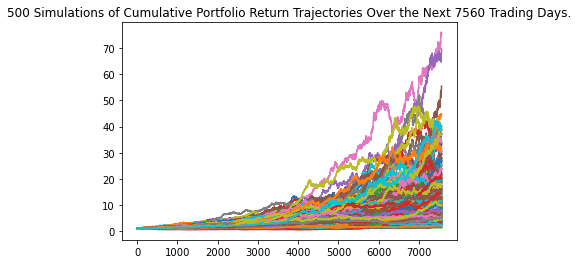

In [40]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

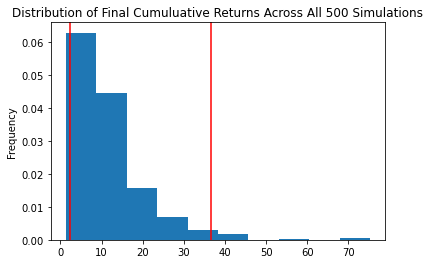

In [41]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()


# Print summary statistics
print(tbl)

count           500.000000
mean             11.643938
std               8.905608
min               1.316125
25%               6.024023
50%               9.314653
75%              14.395431
max              75.300408
95% CI Lower      2.355972
95% CI Upper     36.695207
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [43]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[-2] * initial_investment,2)
ci_upper = round(tbl[-1] * initial_investment,2)

# Print results
print(f"""There is a 95% chance that an initial investment of ${initial_investment} in the portfolio 
over the next 30 years will end within in the range of
${ci_lower} and ${ci_upper}""")

There is a 95% chance that an initial investment of $20000 in the portfolio 
over the next 30 years will end within in the range of
$47119.44 and $733904.15


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [44]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[-2] * initial_investment,2)
ci_upper = round(tbl[-1] * initial_investment,2)

# Print results
print(f"""There is a 95% chance that an initial investment of ${initial_investment} in the portfolio 
over the next 30 years will end within in the range of
${ci_lower} and ${ci_upper}""")

There is a 95% chance that an initial investment of $30000.0 in the portfolio 
over the next 30 years will end within in the range of
$70679.16 and $1100856.22


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [45]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.2,.8],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002719,1.002859,0.999142,0.997867,0.997450,0.996961,0.997787,0.996253,0.996258,1.004313,...,1.000108,0.995924,0.996426,1.007485,1.004765,1.000978,1.004895,1.001748,1.000161,0.997395
2,1.008654,1.006107,1.003304,0.997589,0.996061,1.006297,1.002919,0.998672,1.002836,1.005474,...,0.994731,0.996544,1.006551,1.004696,1.010707,1.002172,1.006317,1.001801,0.997100,0.997791
3,1.013118,1.005881,1.006537,0.995066,0.996783,1.010519,1.004252,1.003517,1.002503,1.005431,...,1.000974,1.000679,1.003488,1.003985,1.006827,1.005390,1.009697,1.002622,0.994694,1.002236
4,1.008976,1.005011,1.012235,0.994801,0.998364,1.010702,1.005319,1.000918,1.005095,0.999972,...,1.002133,1.003169,0.997743,0.999665,1.005696,1.005654,1.013072,1.003619,0.990421,0.998572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.473903,1.152037,1.271102,1.024426,1.023482,1.303931,1.216036,1.385645,1.193584,1.465861,...,1.176662,1.164179,1.265333,1.275955,1.294352,1.122430,1.209632,1.105631,1.223008,1.124215
1257,1.474521,1.155953,1.277527,1.021707,1.021212,1.313026,1.215155,1.390960,1.194726,1.465532,...,1.174025,1.158393,1.266556,1.281619,1.292417,1.117529,1.211432,1.108719,1.224887,1.120941
1258,1.469135,1.155495,1.277719,1.021448,1.020404,1.308826,1.217731,1.393574,1.195573,1.467444,...,1.169102,1.149467,1.267045,1.272885,1.288284,1.119893,1.208140,1.109691,1.227917,1.119048
1259,1.467054,1.161159,1.275416,1.025525,1.024877,1.309121,1.216932,1.392750,1.201772,1.470342,...,1.172796,1.153035,1.269321,1.261729,1.288894,1.118811,1.211608,1.110860,1.220965,1.122165


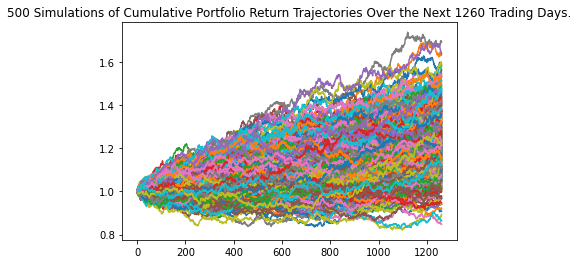

In [26]:
# Plot simulation outcomes
line_plot = MC_five_year.plot_simulation()

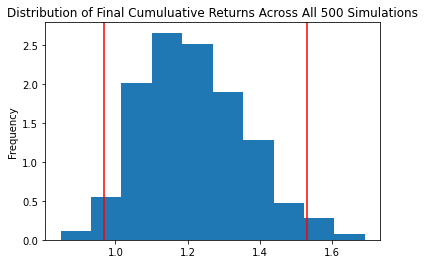

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_five_year.summarize_cumulative_return()


# Print summary statistics
print(tbl)

count           500.000000
mean              1.216101
std               0.143927
min               0.847760
25%               1.106602
50%               1.202040
75%               1.314907
max               1.690984
95% CI Lower      0.968760
95% CI Upper      1.531627
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower = round(tbl[-2] * initial_investment,2)
ci_upper = round(tbl[-1] * initial_investment,2)

# Print results
print(f"""There is a 95% chance that an initial investment of ${initial_investment} in the portfolio 
over the next 5 years will end within in the range of
${ci_lower} and ${ci_upper}""")

There is a 95% chance that an initial investment of $60000 in the portfolio 
over the next 5 years will end within in the range of
$58125.62 and $91897.6


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.8,.2],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000426,1.004337,1.001759,1.000815,0.998068,0.996643,0.995979,1.002678,0.998290,0.999893,...,1.001233,1.003723,0.997899,1.000620,1.003094,0.999747,0.996474,0.998877,1.000919,0.996309
2,1.001578,1.004612,0.996666,0.998641,0.995175,0.996737,0.996533,1.007404,0.996996,0.999361,...,0.997674,1.005925,0.999281,1.002742,1.008235,1.000053,0.997032,0.994123,1.003198,0.992723
3,1.002120,1.001201,0.996879,0.996498,0.992953,0.993380,0.990903,1.010768,0.991938,0.997814,...,0.999337,0.997301,0.999085,1.008940,1.011386,1.002248,0.999333,0.997847,1.001927,0.995804
4,1.001189,0.999110,0.996806,0.994033,0.990895,0.996353,0.990541,1.012755,0.994372,0.995924,...,0.999285,0.994206,0.998584,1.010828,1.010798,0.997333,1.002579,1.002349,0.998231,0.994280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.085711,1.595592,1.589880,1.116974,1.455669,1.357894,1.561150,1.403878,1.278520,1.181732,...,1.341349,1.452611,1.141598,1.333558,1.648251,1.359906,1.604073,1.423397,1.217121,1.990236
2517,1.083052,1.596579,1.590518,1.120982,1.461032,1.352457,1.567675,1.401271,1.283449,1.177528,...,1.334586,1.444251,1.132494,1.332327,1.650760,1.363227,1.599311,1.421038,1.221599,1.997904
2518,1.080578,1.593427,1.585932,1.118682,1.458401,1.347919,1.560597,1.406773,1.283403,1.174787,...,1.338122,1.444547,1.134452,1.323659,1.659206,1.363555,1.605825,1.414649,1.218957,1.989487
2519,1.079723,1.584600,1.581312,1.113735,1.459210,1.350000,1.561452,1.410049,1.284321,1.174165,...,1.339735,1.446152,1.135473,1.318537,1.648670,1.360906,1.609818,1.423869,1.218373,1.981614


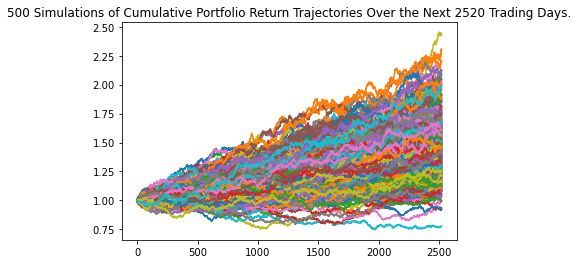

In [46]:
# Plot simulation outcomes
line_plot = MC_ten_year.plot_simulation()

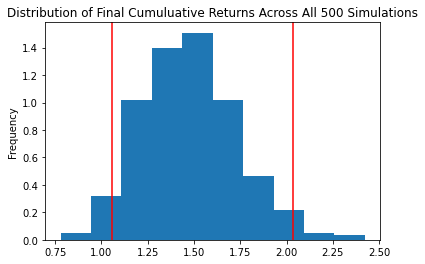

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten_year.plot_distribution()

In [47]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_ten_year.summarize_cumulative_return()


# Print summary statistics
print(tbl)

count           500.000000
mean              1.477887
std               0.256570
min               0.779082
25%               1.296186
50%               1.461527
75%               1.630293
max               2.423164
95% CI Lower      1.059335
95% CI Upper      2.033096
Name: 2520, dtype: float64


In [48]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower = round(tbl[-2] * initial_investment,2)
ci_upper = round(tbl[-1] * initial_investment,2)

# Print results
print(f"""There is a 95% chance that an initial investment of ${initial_investment} in the portfolio 
over the next 10 years will end within in the range of
${ci_lower} and ${ci_upper}""")


There is a 95% chance that an initial investment of $60000 in the portfolio 
over the next 10 years will end within in the range of
$63560.11 and $121985.76
